In [1]:
import time
import os
import random
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data import SubsetRandomSampler

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

from utils import *

In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

BATCH_SIZE = 256

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# For Supervised
train_transforms, test_transforms = None, None
train_loader, valid_loader, test_loader = get_dataloaders_cifar10(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2)

train_transforms = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: torch.flatten(x))])
test_transforms = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: torch.flatten(x))])
train_loader_flatten, valid_loader_flatten, test_loader_flatten = get_dataloaders_cifar10(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2)

for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    print()
    break

for images, labels in train_loader_flatten:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    print()
    break

Files already downloaded and verified
Files already downloaded and verified
Image batch dimensions: torch.Size([256, 3, 32, 32])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([7, 9, 5, 7, 8, 7, 1, 5, 7, 3])

Image batch dimensions: torch.Size([256, 3072])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 0, 6, 9, 2, 3, 7, 5, 3, 9])



In [3]:
model_vgg = VGG16(num_classes=10)
model_resnet = ResNet(ResidualBlock, [2, 2, 2]).to(device)
model_mlp = MultilayerPerceptron()

In [4]:
test_acc_lst = {'vgg':[],'resnet':[],'mlp':[]}

*************************************************************************************
Model: vgg, lr: 0.0001
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 2.6883
Epoch: 001/010 | Batch 0100/0175 | Loss: 2.2948
Epoch: 001/010 | Train: 19.69% | Validation: 20.20%
Time elapsed: 0.72 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 2.2768
Epoch: 002/010 | Batch 0100/0175 | Loss: 2.2437
Epoch: 002/010 | Train: 24.74% | Validation: 24.58%
Time elapsed: 1.44 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 2.2304
Epoch: 003/010 | Batch 0100/0175 | Loss: 2.1726
Epoch: 003/010 | Train: 28.32% | Validation: 28.24%
Time elapsed: 2.17 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 2.1778
Epoch: 004/010 | Batch 0100/0175 | Loss: 2.1088
Epoch: 004/010 | Train: 29.36% | Validation: 29.20%
Time elapsed: 2.91 min
Epoch: 005/010 | Batch 0000/0175 | Loss: 2.0822
Epoch: 005/010 | Batch 0100/0175 | Loss: 2.0342
Epoch: 005/010 | Train: 3

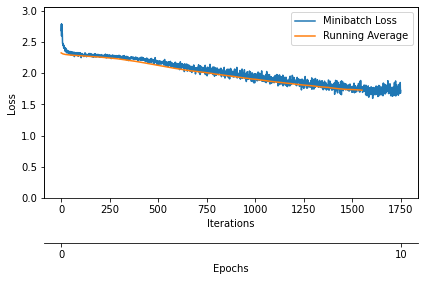

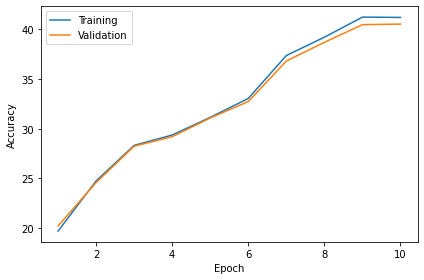

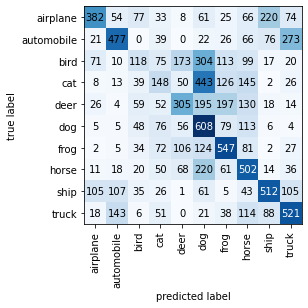

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: vgg, lr: 0.0003
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 1.6448
Epoch: 001/010 | Batch 0100/0175 | Loss: 1.6522
Epoch: 001/010 | Train: 43.81% | Validation: 42.88%
Time elapsed: 0.70 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 1.6516
Epoch: 002/010 | Batch 0100/0175 | Loss: 1.6597
Epoch: 002/010 | Train: 47.19% | Validation: 46.32%
Time elapsed: 1.37 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 1.3938
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.4503
Epoch: 003/010 | Train: 48.38% | Validation: 48.36%
Time elapsed: 2.10 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.3904
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.3879
Epoch: 004/010 | Train:

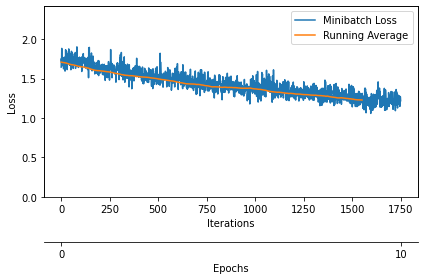

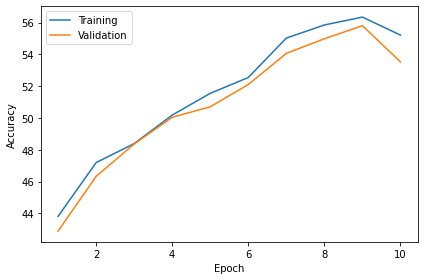

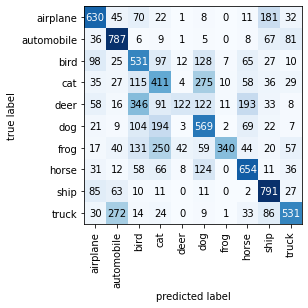

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: vgg, lr: 0.001
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 1.2903
Epoch: 001/010 | Batch 0100/0175 | Loss: 1.3620
Epoch: 001/010 | Train: 55.94% | Validation: 55.34%
Time elapsed: 0.67 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 1.2951
Epoch: 002/010 | Batch 0100/0175 | Loss: 1.1374
Epoch: 002/010 | Train: 60.95% | Validation: 58.62%
Time elapsed: 1.42 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 1.1373
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.0875
Epoch: 003/010 | Train: 61.04% | Validation: 58.28%
Time elapsed: 2.18 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.0546
Epoch: 004/010 | Batch 0100/0175 | Loss: 0.9854
Epoch: 004/010 | Train: 

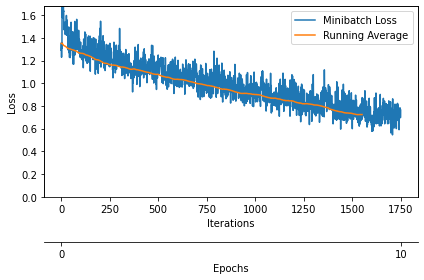

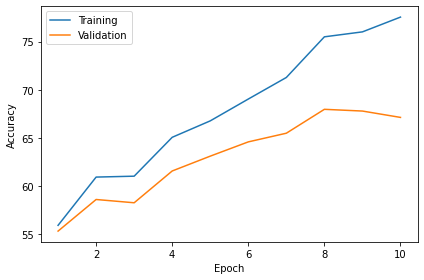

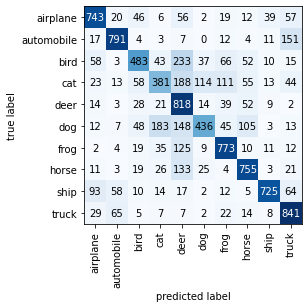

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: vgg, lr: 0.003
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 0.7583
Epoch: 001/010 | Batch 0100/0175 | Loss: 0.8966
Epoch: 001/010 | Train: 72.40% | Validation: 66.84%
Time elapsed: 0.75 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 0.8179
Epoch: 002/010 | Batch 0100/0175 | Loss: 0.8045
Epoch: 002/010 | Train: 75.00% | Validation: 68.04%
Time elapsed: 1.47 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 0.7613
Epoch: 003/010 | Batch 0100/0175 | Loss: 0.6750
Epoch: 003/010 | Train: 79.74% | Validation: 71.04%
Time elapsed: 2.22 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 0.5070
Epoch: 004/010 | Batch 0100/0175 | Loss: 0.6157
Epoch: 004/010 | Train: 

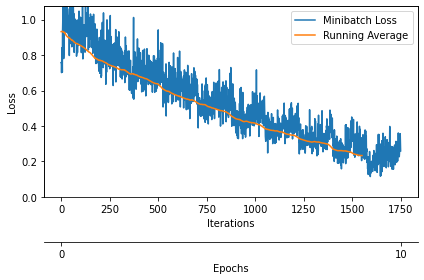

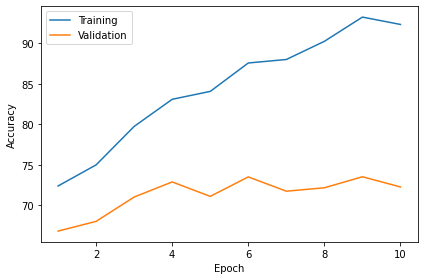

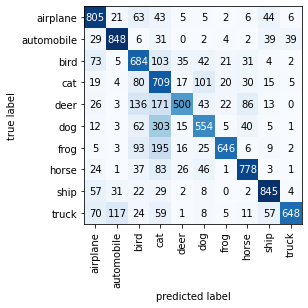

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: vgg, lr: 0.01
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 0.2595
Epoch: 001/010 | Batch 0100/0175 | Loss: 2.3094
Epoch: 001/010 | Train: 13.46% | Validation: 13.82%
Time elapsed: 0.71 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 2.3012
Epoch: 002/010 | Batch 0100/0175 | Loss: 2.1947
Epoch: 002/010 | Train: 19.13% | Validation: 18.36%
Time elapsed: 1.44 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 2.0454
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.8626
Epoch: 003/010 | Train: 36.33% | Validation: 36.10%
Time elapsed: 2.14 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.6602
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.6262
Epoch: 004/010 | Train: 4

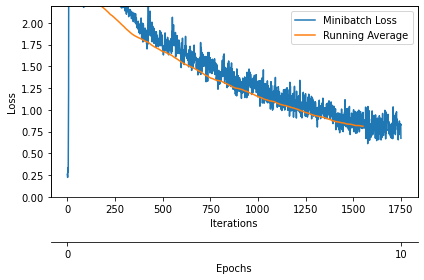

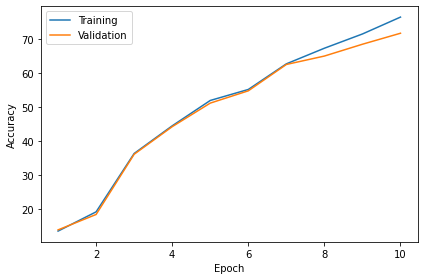

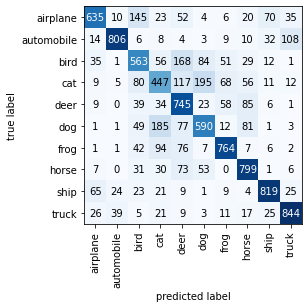

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: resnet, lr: 0.0001
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 2.4603
Epoch: 001/010 | Batch 0100/0175 | Loss: 2.2965
Epoch: 001/010 | Train: 16.76% | Validation: 15.86%
Time elapsed: 0.76 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 2.2408
Epoch: 002/010 | Batch 0100/0175 | Loss: 2.1684
Epoch: 002/010 | Train: 20.93% | Validation: 20.06%
Time elapsed: 1.49 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 2.1415
Epoch: 003/010 | Batch 0100/0175 | Loss: 2.0624
Epoch: 003/010 | Train: 24.76% | Validation: 24.52%
Time elapsed: 2.13 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 2.0256
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.9900
Epoch: 004/010 | Tra

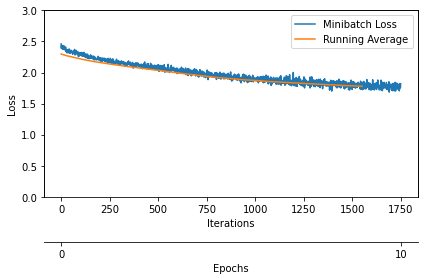

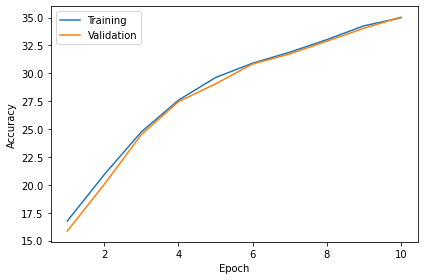

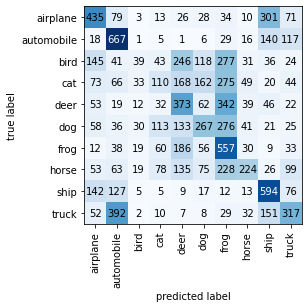

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: resnet, lr: 0.0003
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 1.8094
Epoch: 001/010 | Batch 0100/0175 | Loss: 1.7254
Epoch: 001/010 | Train: 37.26% | Validation: 37.80%
Time elapsed: 0.74 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 1.6473
Epoch: 002/010 | Batch 0100/0175 | Loss: 1.8131
Epoch: 002/010 | Train: 38.90% | Validation: 39.08%
Time elapsed: 1.49 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 1.6935
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.6638
Epoch: 003/010 | Train: 40.63% | Validation: 40.20%
Time elapsed: 2.22 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.6457
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.5845
Epoch: 004/010 | Tra

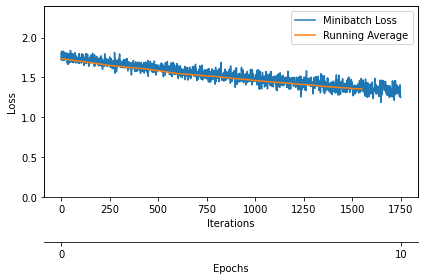

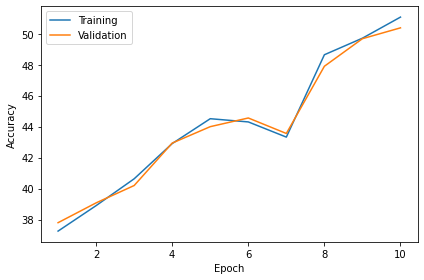

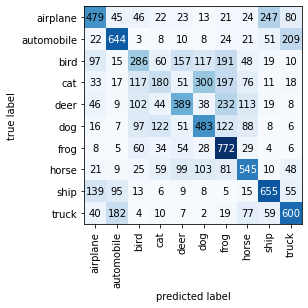

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: resnet, lr: 0.001
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 1.2165
Epoch: 001/010 | Batch 0100/0175 | Loss: 1.3675
Epoch: 001/010 | Train: 50.91% | Validation: 49.96%
Time elapsed: 0.71 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 1.3435
Epoch: 002/010 | Batch 0100/0175 | Loss: 1.3093
Epoch: 002/010 | Train: 48.59% | Validation: 47.42%
Time elapsed: 1.50 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 1.1539
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.1779
Epoch: 003/010 | Train: 54.89% | Validation: 53.74%
Time elapsed: 2.21 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.2538
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.0781
Epoch: 004/010 | Trai

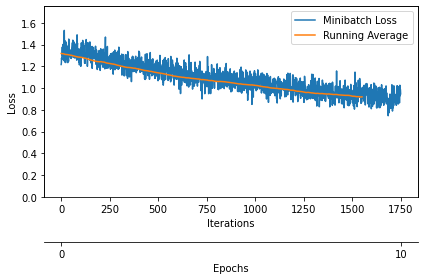

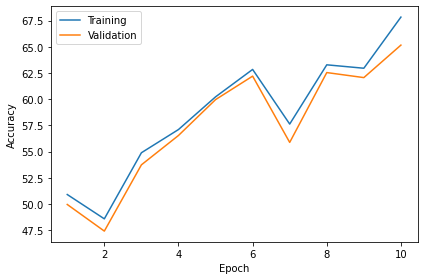

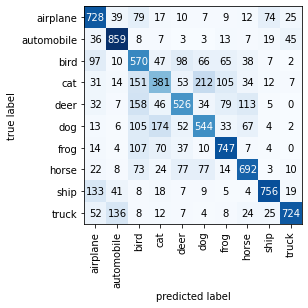

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: resnet, lr: 0.003
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 1.0535
Epoch: 001/010 | Batch 0100/0175 | Loss: 0.9991
Epoch: 001/010 | Train: 62.91% | Validation: 61.10%
Time elapsed: 0.71 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 0.7755
Epoch: 002/010 | Batch 0100/0175 | Loss: 0.9417
Epoch: 002/010 | Train: 55.57% | Validation: 54.52%
Time elapsed: 1.43 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 0.8536
Epoch: 003/010 | Batch 0100/0175 | Loss: 0.9697
Epoch: 003/010 | Train: 65.15% | Validation: 63.86%
Time elapsed: 2.13 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 0.8864
Epoch: 004/010 | Batch 0100/0175 | Loss: 0.8928
Epoch: 004/010 | Trai

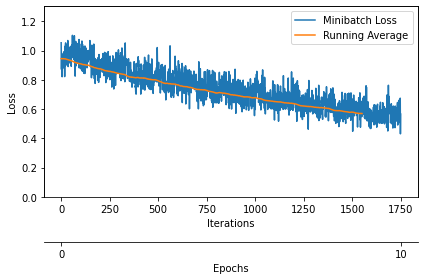

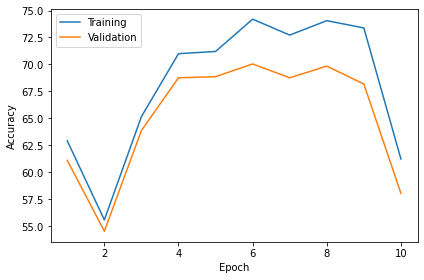

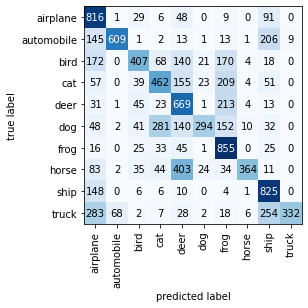

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: resnet, lr: 0.01
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 0.5818
Epoch: 001/010 | Batch 0100/0175 | Loss: 0.7395
Epoch: 001/010 | Train: 60.74% | Validation: 59.36%
Time elapsed: 0.79 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 0.6010
Epoch: 002/010 | Batch 0100/0175 | Loss: 0.7019
Epoch: 002/010 | Train: 69.74% | Validation: 67.22%
Time elapsed: 1.52 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 0.5451
Epoch: 003/010 | Batch 0100/0175 | Loss: 0.6732
Epoch: 003/010 | Train: 77.00% | Validation: 72.40%
Time elapsed: 2.19 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 0.4681
Epoch: 004/010 | Batch 0100/0175 | Loss: 0.4915
Epoch: 004/010 | Train

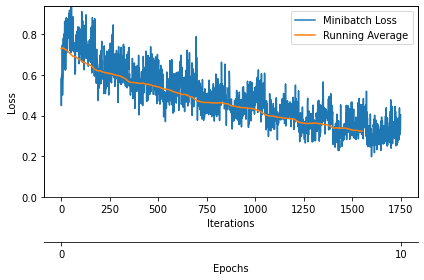

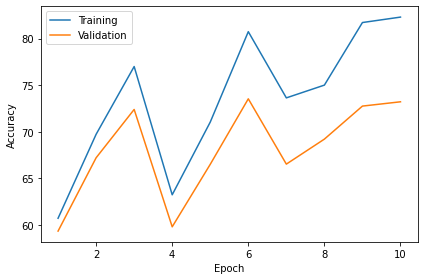

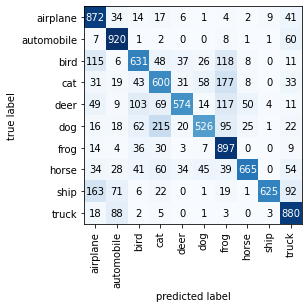

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: mlp, lr: 0.0001
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 2.3102
Epoch: 001/010 | Batch 0100/0175 | Loss: 2.3057
Epoch: 001/010 | Train: 10.04% | Validation: 9.94%
Time elapsed: 0.75 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 2.3069
Epoch: 002/010 | Batch 0100/0175 | Loss: 2.3053
Epoch: 002/010 | Train: 10.05% | Validation: 9.90%
Time elapsed: 1.48 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 2.2937
Epoch: 003/010 | Batch 0100/0175 | Loss: 2.2956
Epoch: 003/010 | Train: 10.19% | Validation: 10.06%
Time elapsed: 2.19 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 2.2929
Epoch: 004/010 | Batch 0100/0175 | Loss: 2.2853
Epoch: 004/010 | Train: 1

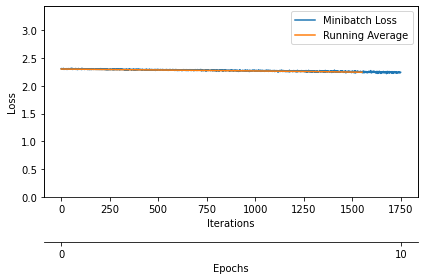

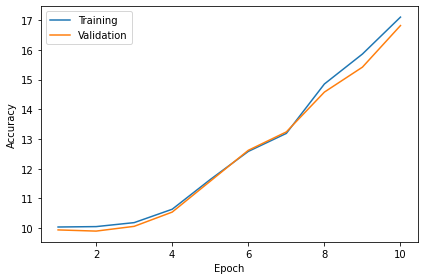

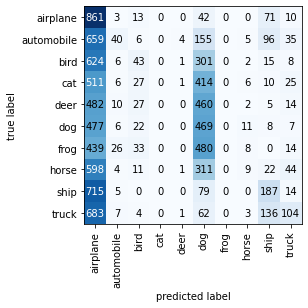

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: mlp, lr: 0.0003
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 2.2403
Epoch: 001/010 | Batch 0100/0175 | Loss: 2.2186
Epoch: 001/010 | Train: 20.07% | Validation: 20.24%
Time elapsed: 0.75 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 2.2267
Epoch: 002/010 | Batch 0100/0175 | Loss: 2.1944
Epoch: 002/010 | Train: 21.70% | Validation: 22.36%
Time elapsed: 1.48 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 2.1879
Epoch: 003/010 | Batch 0100/0175 | Loss: 2.1593
Epoch: 003/010 | Train: 22.23% | Validation: 22.56%
Time elapsed: 2.21 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 2.1584
Epoch: 004/010 | Batch 0100/0175 | Loss: 2.1347
Epoch: 004/010 | Train:

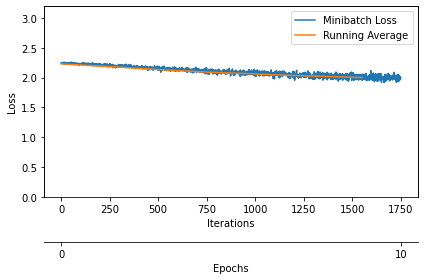

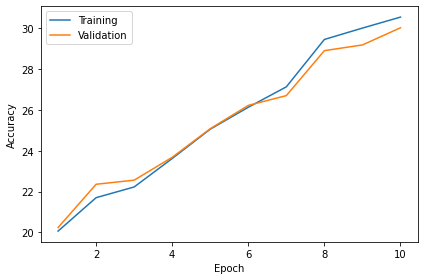

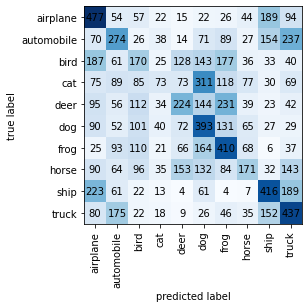

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: mlp, lr: 0.001
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 2.0015
Epoch: 001/010 | Batch 0100/0175 | Loss: 1.8981
Epoch: 001/010 | Train: 30.67% | Validation: 30.44%
Time elapsed: 0.66 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 1.9354
Epoch: 002/010 | Batch 0100/0175 | Loss: 1.9340
Epoch: 002/010 | Train: 32.12% | Validation: 31.86%
Time elapsed: 1.35 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 1.9376
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.8514
Epoch: 003/010 | Train: 32.62% | Validation: 32.06%
Time elapsed: 2.07 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.8561
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.8341
Epoch: 004/010 | Train: 

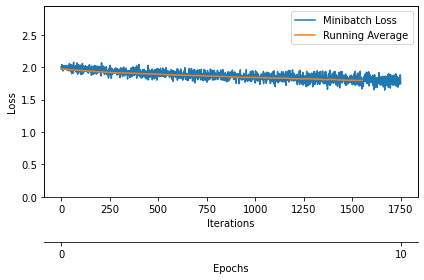

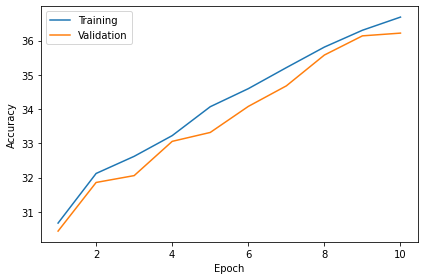

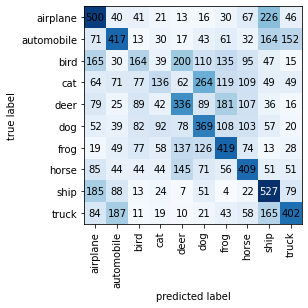

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: mlp, lr: 0.003
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 1.7644
Epoch: 001/010 | Batch 0100/0175 | Loss: 1.7826
Epoch: 001/010 | Train: 37.73% | Validation: 36.92%
Time elapsed: 0.69 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 1.8210
Epoch: 002/010 | Batch 0100/0175 | Loss: 1.7101
Epoch: 002/010 | Train: 38.77% | Validation: 37.68%
Time elapsed: 1.34 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 1.7490
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.6748
Epoch: 003/010 | Train: 39.66% | Validation: 38.82%
Time elapsed: 2.04 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.6397
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.6451
Epoch: 004/010 | Train: 

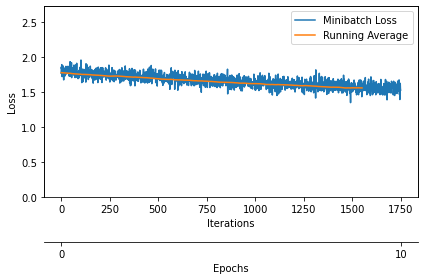

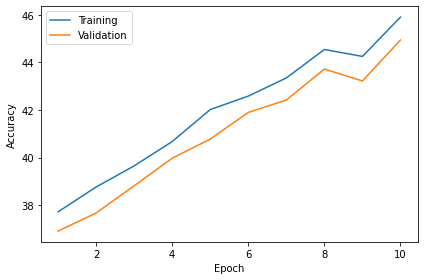

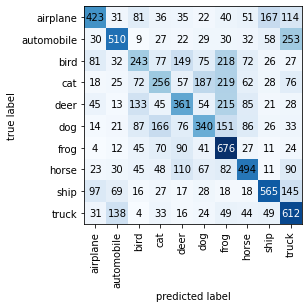

*************************************************************************************
*************************************************************************************

*************************************************************************************
Model: mlp, lr: 0.01
*************************************************************************************
Epoch: 001/010 | Batch 0000/0175 | Loss: 1.6581
Epoch: 001/010 | Batch 0100/0175 | Loss: 1.6493
Epoch: 001/010 | Train: 43.24% | Validation: 42.08%
Time elapsed: 0.62 min
Epoch: 002/010 | Batch 0000/0175 | Loss: 1.5603
Epoch: 002/010 | Batch 0100/0175 | Loss: 1.5013
Epoch: 002/010 | Train: 46.25% | Validation: 44.92%
Time elapsed: 1.26 min
Epoch: 003/010 | Batch 0000/0175 | Loss: 1.4253
Epoch: 003/010 | Batch 0100/0175 | Loss: 1.4642
Epoch: 003/010 | Train: 47.62% | Validation: 46.24%
Time elapsed: 1.91 min
Epoch: 004/010 | Batch 0000/0175 | Loss: 1.3797
Epoch: 004/010 | Batch 0100/0175 | Loss: 1.4509
Epoch: 004/010 | Train: 4

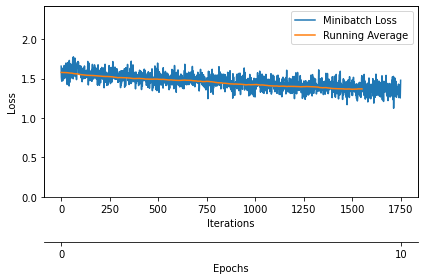

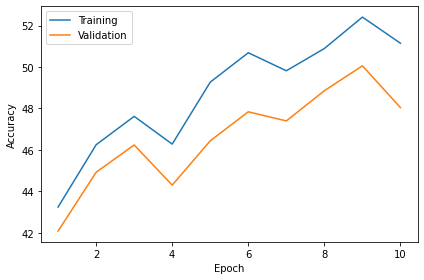

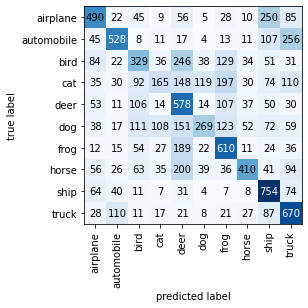

*************************************************************************************
*************************************************************************************



In [5]:
NUM_EPOCHS = 10
for model_name, model in zip(['vgg', 'resnet', 'mlp'],[model_vgg, model_resnet, model_mlp]):
    for lr in [0.0001,0.0003,0.001,0.003,0.01]:
        print("*************************************************************************************")
        print(f"Model: {model_name}, lr: {lr}")
        print("*************************************************************************************")
        if model_name == 'mlp':
            data_loader = [train_loader_flatten, valid_loader_flatten, test_loader_flatten]
        else:
            data_loader = [train_loader, valid_loader, test_loader]
        val = start_train(
            model, device, NUM_EPOCHS, data_loader, lr = lr, 
            FileName = f"model_{model_name}_{str(lr).split('.')[-1]}")
        test_acc_lst[model_name].append(val)
        print("*************************************************************************************")
        print("*************************************************************************************")
        print()

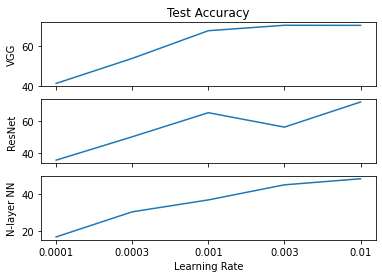

In [9]:
fig, ax = plt.subplots(3, 1, sharex = True)
ax[0].plot(test_acc_lst['vgg'])
ax[1].plot(test_acc_lst['resnet'])
ax[2].plot(test_acc_lst['mlp'])
ax[0].set_xticks(np.arange(5))
ax[0].set_xticklabels([0.0001,0.0003,0.001,0.003,0.01])
ax[2].set_xlabel('Learning Rate')
ax[0].set_ylabel('VGG')
ax[1].set_ylabel('ResNet')
ax[2].set_ylabel('N-layer NN')
ax[0].set_title('Test Accuracy')
plt.show()